# **whatsapp group analyzer** 

importing the libraries


In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt



we start by checking whether a certain line in the whatsapp.text starts with date and time

In [1]:
def startsWithDate(s):
    pattern = '^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)(\d{2}|\d{4}), ([0-9][0-9]):([0-9][0-9]) -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

detecting the author of certain message in the data

In [2]:
def startsWithAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India)
        '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US)
        '([+]\d{2} \d{4} \d{7})',          #mobile number Europe
        '^(?:\+254|254)(\d{9})$'         # Mobile Number (Kenya)
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [4]:
def getDataPoint(line):
        
    splitLine = line.split(' - ') 

    dateTime = splitLine[0] # example of a dateTime = 18/10/2020
    
    date, time = dateTime.split(', ') 
    
    message = ' '.join(splitLine[1:]) 
    
    if startsWithAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:]) 
    else:
        author = None
    return date, time, author, message

loading the data which was saved in the google drive as a .txt file

In [5]:
parsedData = [] # a list that will help to keep track of data 
conversationPath = '/content/drive/My Drive/Whatsapp data/WhatsApp Chat with AI-ML -2 -2020.txt' #loading the data
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file which contains information about end-to-end encryption)
        
    messageBuffer = [] # Buffer to capture intermediate output for multi-line messages
    date, time, author = None, None, None # Intermediate variables to keep track of the current message being processed
    
    while True:
        line = fp.readline() 
        if not line: # Stop reading further if end of file has been reached
            break
        line = line.strip() # Guarding against erroneous leading and trailing whitespaces
        if startsWithDate(line): # If a line starts with a Date Time pattern, then this indicates the beginning of a new message
            if len(messageBuffer) > 0: # Check if the message buffer contains characters from previous iterations
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) # Save the tokens from the previous message in parsedData
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) # Identify and extract tokens from the line
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line) # If a line doesn't start with a Date Time pattern, then it is part of a multi-line message. So, just append to buffer


FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


splitting the string based on the token of interest

tabulating the data using pandas for the first 20 elements

In [ ]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
df.head(20)

,Date,Time,Author,Message
0,02/10/2020,18:20,None,"+254 799 619965 created group ""AI-ML"""
1,02/10/2020,18:23,None,You joined using this group's invite link
2,02/10/2020,18:23,None,+254 740 623000 joined using this group's invi...
3,02/10/2020,18:23,None,+254 719 379216 joined using this group's invi...
4,02/10/2020,18:23,None,+254 720 641526 joined using this group's invi...
5,02/10/2020,18:24,None,+254 785 656330 joined using this group's invi...
6,02/10/2020,18:24,None,+254 712 102104 joined using this group's invi...
7,02/10/2020,18:24,None,+254 702 671007 joined using this group's invi...
8,02/10/2020,18:24,None,+254 715 762177 joined using this group's invi...
9,02/10/2020,18:25,None,+254 716 180656 joined using this group's invi...


describing the data frame

In [ ]:
#here it will show the number of entries, and the entry that occurs most frequently and in the case its Eugene
df.describe()

,Date,Time,Author,Message
count,219,219,5,219
unique,20,158,1,200
top,02/10/2020,19:49,Debugger,+254 704 452000: <Media omitted>
freq,43,5,5,15


plotting the people who sends messages most

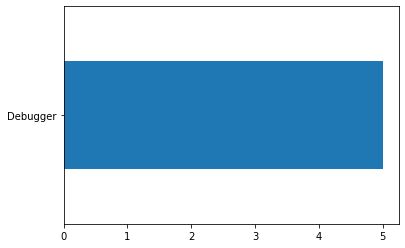

In [ ]:
author_value_counts = df['Author'].value_counts() # Number of messages per author
top_10_author_value_counts = author_value_counts.head(10) # Number of messages per author for the top 10 most active authors
top_10_author_value_counts.plot.barh() # Plot a bar chart using pandas built-in plotting apis

messages that have no authors

In [ ]:
null_authors_df = df[df['Author'].isnull()]
null_authors_df.head()

,Date,Time,Author,Message
0,02/10/2020,18:20,None,"+254 799 619965 created group ""AI-ML"""
1,02/10/2020,18:23,None,You joined using this group's invite link
2,02/10/2020,18:23,None,+254 740 623000 joined using this group's invi...
3,02/10/2020,18:23,None,+254 719 379216 joined using this group's invi...
4,02/10/2020,18:23,None,+254 720 641526 joined using this group's invi...


In [ ]:
finding the number of messages that are sent by 20 authors

           Date   Time    Author          Message
121  07/10/2020  20:19  Debugger  <Media omitted>
130  09/10/2020  21:04  Debugger  <Media omitted>


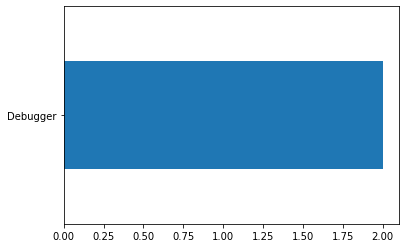

In [ ]:
media_messages_df = df[df['Message'] == '<Media omitted>']
print(media_messages_df.head())

author_media_messages_value_counts = media_messages_df['Author'].value_counts()
top_10_author_media_messages_value_counts = author_media_messages_value_counts.head(20)
top_10_author_media_messages_value_counts.plot.barh()

In [ ]:
messages_df = df.drop(null_authors_df.index) # Drops all rows of the data frame containing messages from null authors
messages_df = messages_df.drop(media_messages_df.index) # Drops all rows of the data frame containing media messages
messages_df.head()

,Date,Time,Author,Message
138,16/10/2020,15:40,Debugger,are you serious??
140,16/10/2020,15:41,Debugger,"Acha kudanganya watu ankoo, lol"
142,16/10/2020,15:46,Debugger,Haya sawasawa ankoo


calculating the letters that has been used as well as words

In [ ]:

messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))

In [ ]:
#you can skip this
#discrete_columns = [['Date', 'Time', 'Author', 'Message']]
#messages_df[discrete_columns].describe()

#continuous_columns = [['Letter_Count', 'Word_Count']]
#essages_df[continuous_columns].describe()

KeyError: ignored

In [ ]:
messages_df['Letter_Count'].sum(), messages_df['Word_Count'].sum()

(67, 11)

Text(0, 0.5, 'Authors')

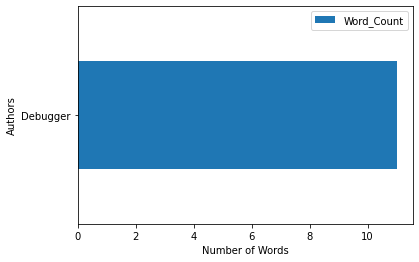

In [ ]:
total_word_count_grouped_by_author = messages_df[['Author', 'Word_Count']].groupby('Author').sum()
sorted_total_word_count_grouped_by_author = total_word_count_grouped_by_author.sort_values('Word_Count', ascending=False)
top_10_sorted_total_word_count_grouped_by_author = sorted_total_word_count_grouped_by_author.head(10)
top_10_sorted_total_word_count_grouped_by_author.plot.barh()
plt.xlabel('Number of Words')
plt.ylabel('Authors')

getting the commonest words frequency of usage

Text(0, 0.5, 'Frequency')

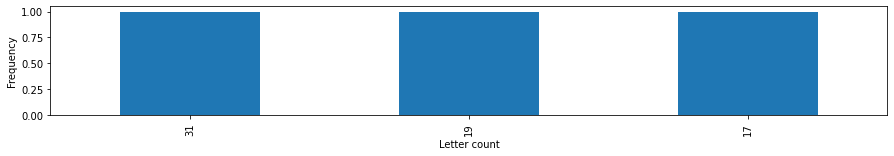

In [ ]:
plt.figure(figsize=(15, 2))
letter_count_value_counts = messages_df['Letter_Count'].value_counts()
top_40_letter_count_value_counts = letter_count_value_counts.head(40)
top_40_letter_count_value_counts.plot.bar()
plt.xlabel('Letter count')
plt.ylabel('Frequency')

Text(0, 0.5, 'Authors')

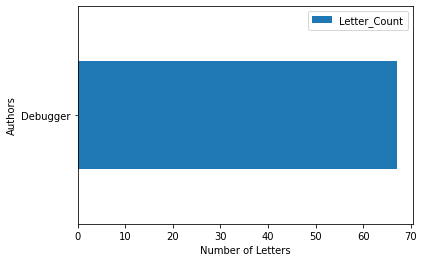

In [ ]:
total_letter_count_grouped_by_author = messages_df[['Author', 'Letter_Count']].groupby('Author').sum()
sorted_total_letter_count_grouped_by_author = total_letter_count_grouped_by_author.sort_values('Letter_Count', ascending=False)
top_10_sorted_total_letter_count_grouped_by_author = sorted_total_letter_count_grouped_by_author.head(10)
top_10_sorted_total_letter_count_grouped_by_author.plot.barh()
plt.xlabel('Number of Letters')
plt.ylabel('Authors')

Text(0, 0.5, 'Frequency')

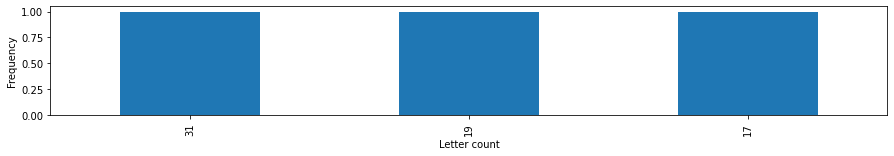

In [ ]:
plt.figure(figsize=(15, 2))
letter_count_value_counts = messages_df['Letter_Count'].value_counts()
top_40_letter_count_value_counts = letter_count_value_counts.head(40)
top_40_letter_count_value_counts.plot.bar()
plt.xlabel('Letter count')
plt.ylabel('Frequency')

getting the date by which most of messages were sent

Text(0, 0.5, 'Date')

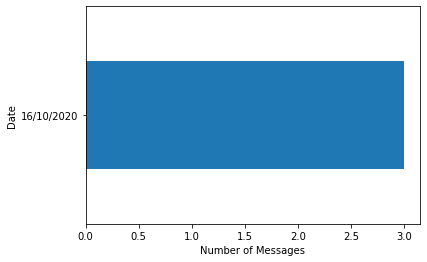

In [ ]:
messages_df['Date'].value_counts().head(10).plot.barh() # Top 10 Dates on which the most number of messages were sent
plt.xlabel('Number of Messages')
plt.ylabel('Date')

the time the group is most active

Text(0, 0.5, 'Time')

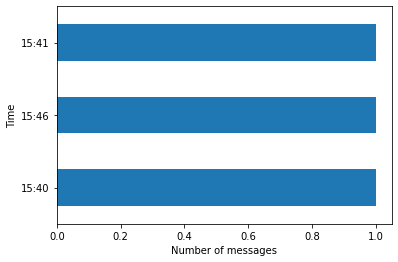

In [ ]:
messages_df['Time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Time')

In [ ]:
messages_df['Hour'] = messages_df['Time'].apply(lambda x : x.split(':')[0]) # The first token of a value in the Time Column contains the hour (Eg., "20" in "20:15")


time of day the group is most active

Text(0, 0.5, 'Hour of Day')

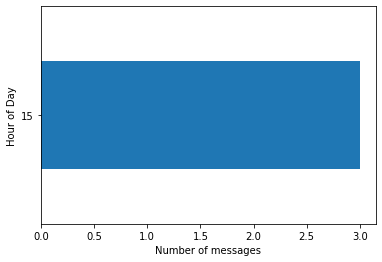

In [ ]:
messages_df['Hour'].value_counts().head(10).sort_index(ascending=False).plot.barh() # Top 10 Hours of the day during which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Hour of Day')

you will note that the author is just one,and thats me 'debugger', the reason is because that's the only person whose name is recognized(saved in my contacts). I wish I had your names It would have given a better result.
**Feel free to modify,if you have several number of people you have saved in your contact list it will be better**


Incase you get to learn something new and you would like to share with me or another technique you think I dont know or query, my whatsapp Number is **+254705508169**